/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.5250 - loss: 0.7175 - val_accuracy: 0.8509 - val_loss: 0.6410
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5680 - loss: 0.7252 - val_accuracy: 0.9211 - val_loss: 0.6207
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6049 - loss: 0.6708 - val_accuracy: 0.9298 - val_loss: 0.6020
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5909 - loss: 0.6742 - val_accuracy: 0.9386 - val_loss: 0.5791
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5956 - loss: 0.6880 - val_accuracy: 0.9386 - val_loss: 0.5536
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6764 - loss: 0.6019 - val_accuracy: 0.9386 - val_loss: 0.5227
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7180 - loss: 0.5715 - val_accuracy: 0.9474 - val_loss: 0.4860
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7057 - loss: 0.5522 - val_accuracy: 0.9386 - val_loss:

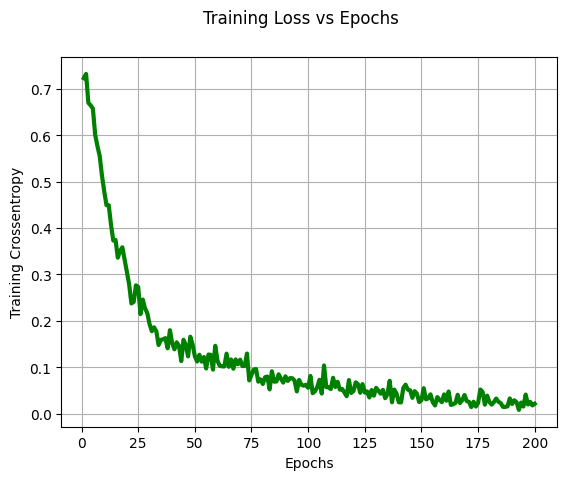

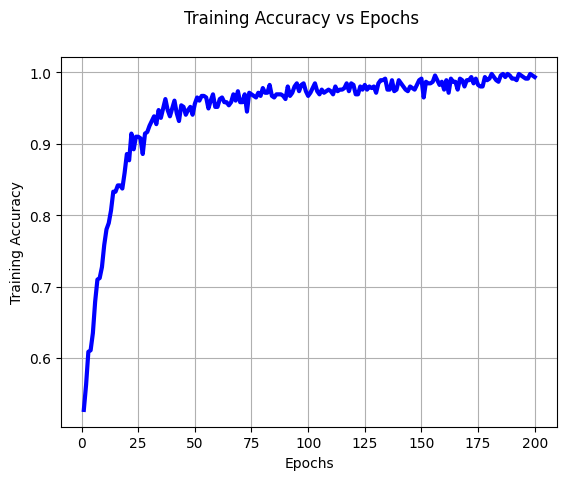

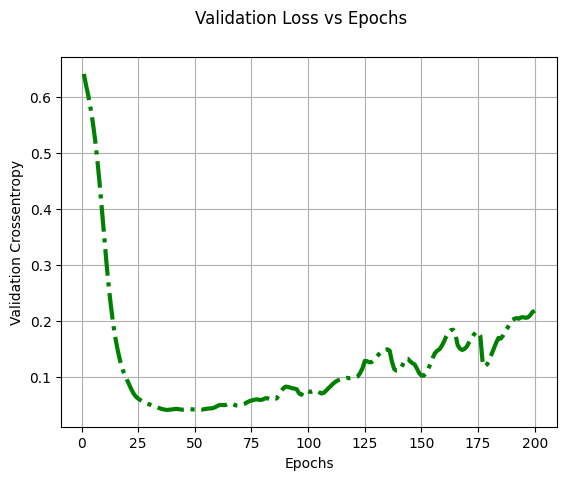

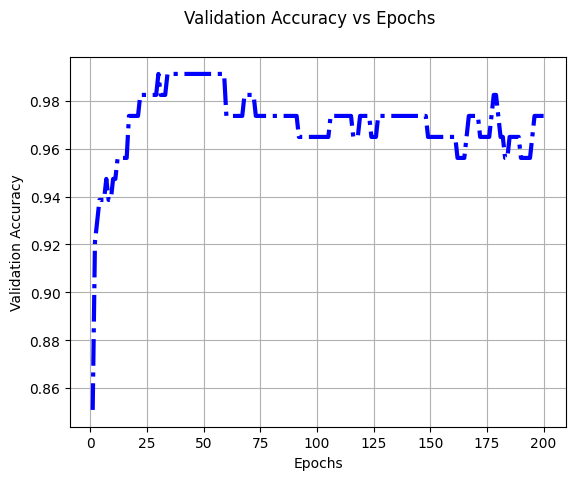

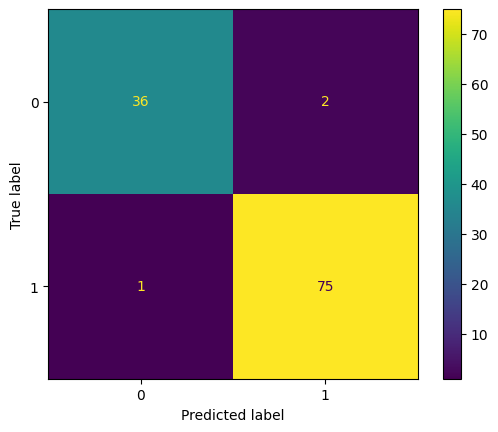

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import datasets
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

bcancer = datasets.load_breast_cancer()

#Breast Cancer Wisconsin (Diagnostic) Data Set
#Classes = 20
#Samples per class = 212(M),357(B)
# Samples total = 569
# Dimensionality = 30
# Features are real, positive

# Feature names
#'mean radius' 'mean texture' 'mean perimeter' 'mean area'
# 'mean smoothness' 'mean compactness' 'mean concavity'
# 'mean concave points' 'mean symmetry' 'mean fractal dimension'
# 'radius error' 'texture error' 'perimeter error' 'area error'
# 'smoothness error' 'compactness error' 'concavity error'
# 'concave points error' 'symmetry error' 'fractal dimension error'
# 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
# 'worst smoothness' 'worst compactness' 'worst concavity'
# 'worst concave points' 'worst symmetry' 'worst fractal dimension'

X = bcancer.data
y = bcancer.target

scaler = StandardScaler();
X = scaler.fit_transform(X)

ss = StandardScaler()
X = ss.fit_transform(X)
y = y.reshape(569,1)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state=11)

oh = OneHotEncoder()
ytrain = oh.fit_transform(ytrain).toarray()

model = Sequential()
model.add(Dense(64,input_shape=(30,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

ytestoh = oh.fit_transform(ytest).toarray()

history = model.fit(Xtrain,ytrain,epochs=200,batch_size=100,validation_data=(Xtest,ytestoh))

ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')

cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')

plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()